## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import os
import math
import re
import pickle

In [2]:
PROJECT_OUTPUT_DIR = 'output_images/'

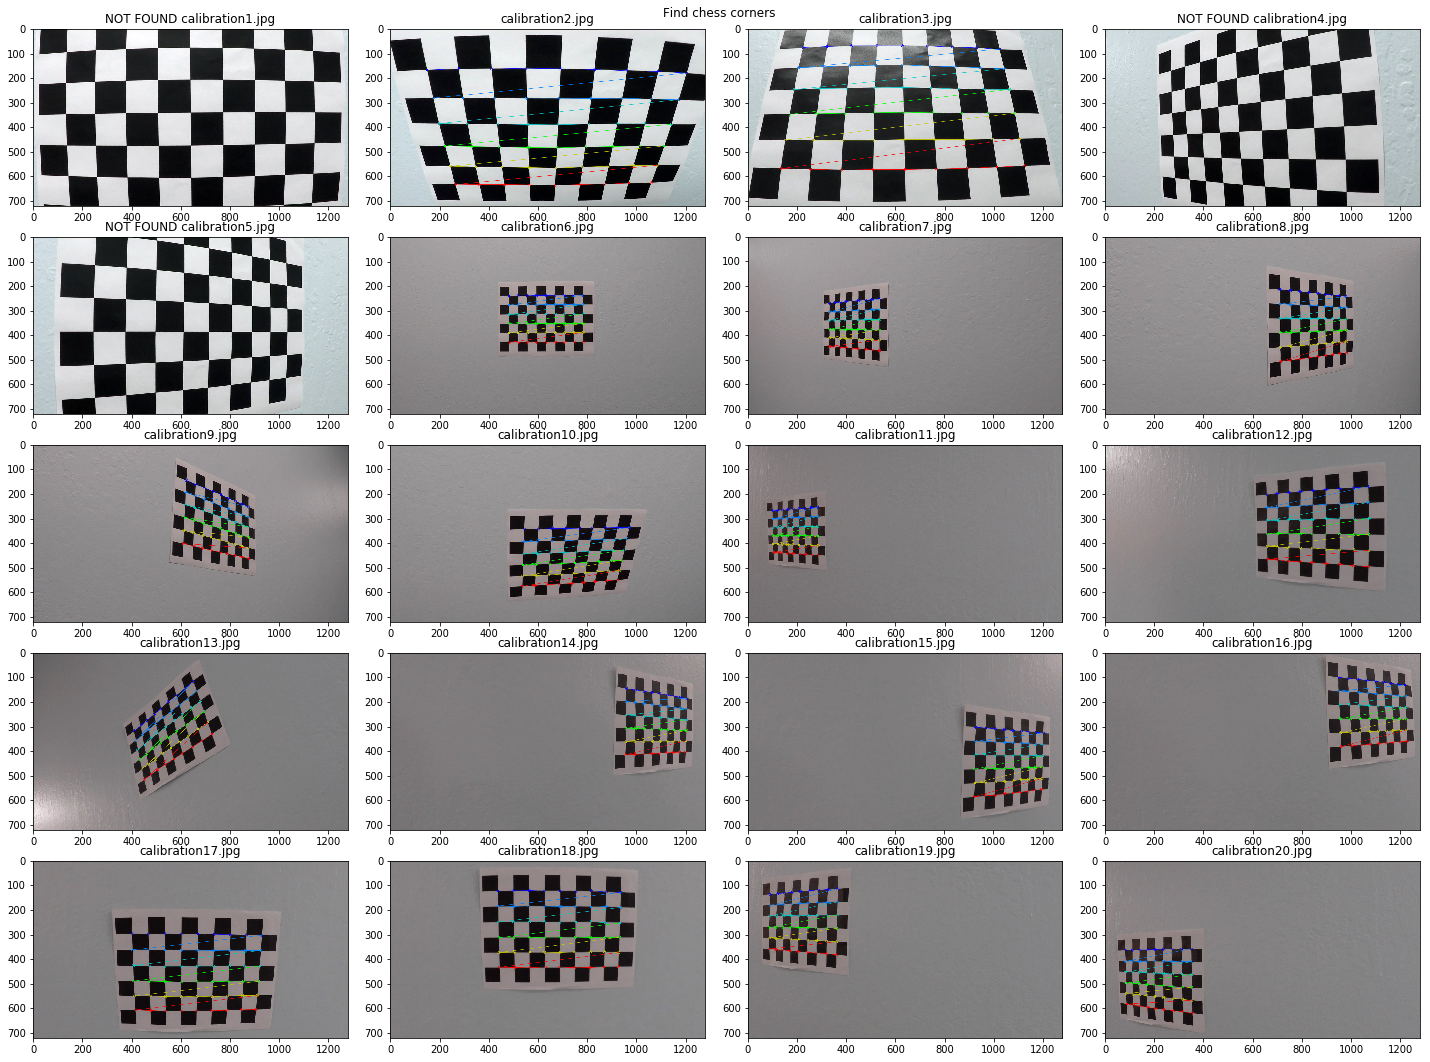

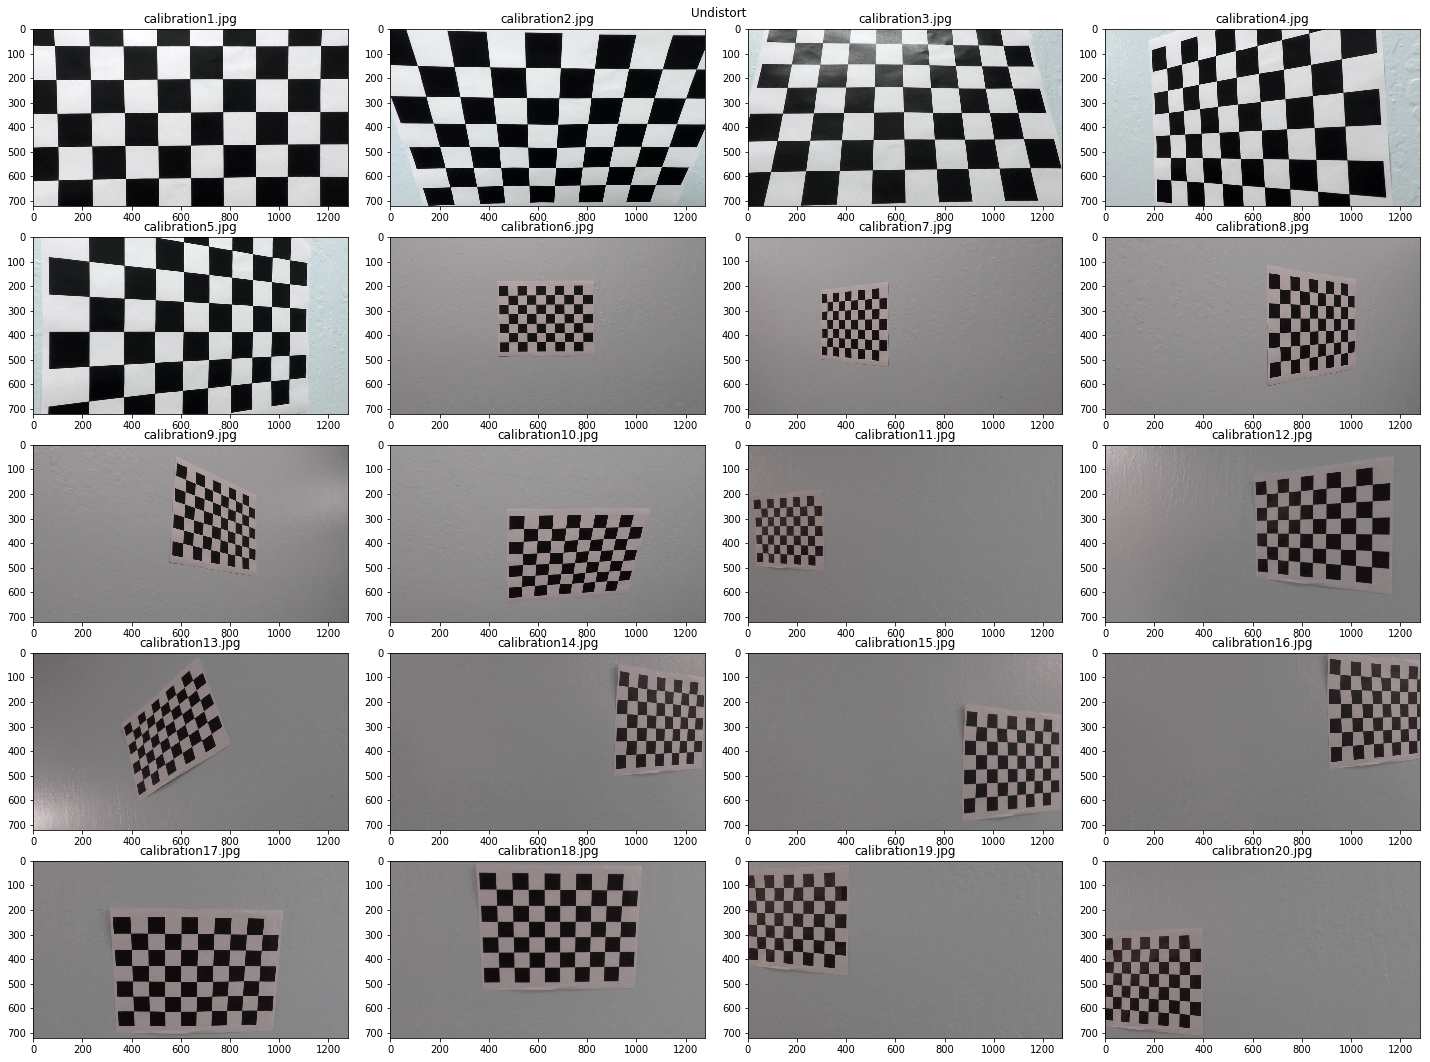

In [3]:
def file_number(fpath):
    fname = os.path.basename(fpath)
    match = re.search('\d+', fname)
    if match == None:
        return 0
    else:
        return int(match.group(0))

def fig_and_axes(num_items):
    ncols = 4
    fig, axes = plt.subplots(ncols=ncols, nrows=math.ceil(num_items / ncols), figsize=(20, 15))
    fig.tight_layout()
    plt.subplots_adjust(top=0.96)
    axes = axes.flatten()
    return (fig, axes)

def calibrate(image_paths):
    # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
    objp = np.zeros((6*9,3), np.float32)
    objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

    # Arrays to store object points and image points from all the images.
    objpoints = [] # 3d points in real world space
    imgpoints = [] # 2d points in image plane.

    fig, axes = fig_and_axes(len(image_paths))
    fig.suptitle('Find chess corners')
    
    # Step through the list and search for chessboard corners
    for image_path, ax in zip(image_paths, axes):
        img = cv2.imread(image_path)
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

        # Find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

        # If found, add object points, image points
        if ret == True:
            objpoints.append(objp)
            imgpoints.append(corners)

            # Draw and display the corners
            img = cv2.drawChessboardCorners(img, (9,6), corners, ret)

            ax.set_title(os.path.basename(image_path))
        else:
            ax.set_title('NOT FOUND ' + os.path.basename(image_path))

        ax.imshow(img)

    cv2.destroyAllWindows()
    
    plt.show()
    
    image_w_h = (1280, 720)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, image_w_h, None, None)
    
    return (mtx, dist)

def undistort(mtx, dist, image_paths):
    fig, axes = fig_and_axes(len(image_paths))
    fig.suptitle('Undistort')
    
    for image_path, ax in zip(image_paths, axes):
        img = cv2.imread(image_path)
        undistorted = cv2.undistort(img, mtx, dist, None, mtx)
        ax.imshow(undistorted)
        ax.set_title(os.path.basename(image_path))
    
    plt.show()
    
    return (mtx, dist)

def calibrate_and_undistort():
    image_paths = glob.glob('camera_cal/calibration*.jpg')
    image_paths = sorted(image_paths, key=file_number)
    
    mtx, dist = calibrate(image_paths)
    
    undistort(mtx, dist, image_paths)
    
    return (mtx, dist)

camera_matrix, distortion_coefficients = calibrate_and_undistort()

In [4]:
with open(PROJECT_OUTPUT_DIR + 'camera_calibration.p', 'wb') as f:
    pickle.dump((camera_matrix, distortion_coefficients), f)

In [5]:
with open(PROJECT_OUTPUT_DIR + 'camera_calibration.p', 'rb') as f:
    camera_matrix, distortion_coefficients = pickle.load(f)

## And so on and so forth...